## This part of code is mainly about 
- exploring data
- finding the most influential channels
- computing dislikes percentage

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# Exploring Data

In [156]:
d = pd.read_csv("USvideos.csv")

In [157]:
# append the number of days a video was in the trending section

d['trending_days'] = d.groupby('video_id')['video_id'].transform('count')
d = data.sort_values(by=['trending_days'], ascending = False)

In [227]:
# Create a data frame for category name since the main data frame only has category id

category_file = open('US_category_id.json')
category_json = json.load(category_file)

height = 32
width = 2
category_df = pd.DataFrame(0, index=range(height), columns=range(width))
category_df.columns = ['category_id','category_name']
category_df

for i in range(32):
    try:
        category_df['category_id'][i] = category_json['items'][i]['id']
        category_df['category_name'][i] = category_json['items'][i]['snippet']['title']
    except:
        pass

In [160]:
# Merge the main df and the category name df by category id.

data = pd.merge(d, category_df, on='category_id')

In [ ]:
# Drop the duplicate videos and keep the first one

unique_video1 = data.drop_duplicates(["video_id"], keep = 'first')

In [274]:
# Drop the duplicate videos and keep the last one

unique_video2 = data.drop_duplicates(["video_id"], keep = 'last')

In [275]:
# Computing the initial average views of videos

initial_avg_views = unique_video1["views"].sum()/(len(unique_video1["views"]))

In [276]:
# Computing the final average views of videos

final_avg_views = unique_video2["views"].sum()/(len(unique_video2["views"]))

In [277]:
# The growth rate of views

(final_avg_views-initial_avg_views)/initial_avg_views

0.009707027546720344

# The Most Influential Channels

In [247]:
# Find how many videos in trending a channel has

unique_video2['channel_videos'] = unique_video2.groupby('channel_title')['channel_title'].transform('count')

unique_channel = unique_video2.drop_duplicates(["channel_title"])

In [325]:
# Find the top 10 channels with the most videos in trending

top10_channel = unique_channel.sort_values(by = 'channel_videos', ascending = False).head(10)
top10_channel = top10_channel.sort_values('category_name', ascending = True)

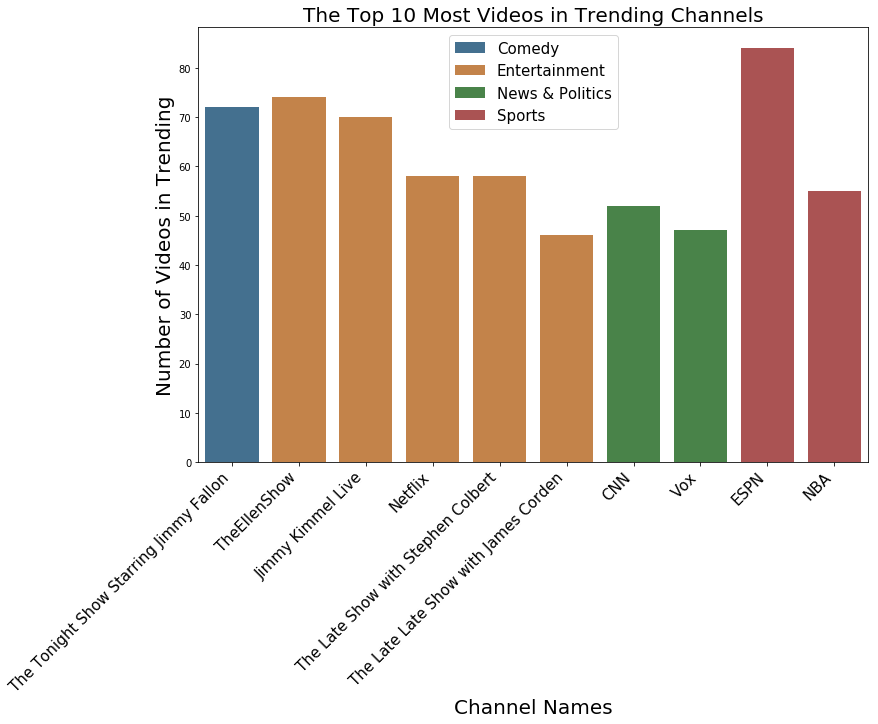

In [438]:
# Barplot - indicating the category of every channel

plt.figure(figsize=(12, 8))
channel_plot = sns.barplot(x='channel_title', y = 'channel_videos', hue='category_name', 
            dodge=False, saturation = 0.5, data=top10_channel)

plt.xticks(ha = 'right', rotation = 45, size = 15)

plt.title('The Top 10 Most Videos in Trending Channels', size = 20)
plt.xlabel('Channel Names', size = 20)
plt.ylabel('Number of Videos in Trending', size = 20)
plt.legend(loc="upper center", prop={'size': 15})

# Seeing if There Are Videos That have More Dislikes Than Likes

In [413]:
# Creating a df with videos that have more dislikes than likes
dislikes_df = unique_video2[unique_video2.dislikes > unique_video2.likes]

# Computing the dislikes rates
dislikes_df['dislikes_percent'] = dislikes_df['dislikes']/(dislikes_df['dislikes'] + dislikes_df['likes'])

# The top 10 videos with the highest dislikes percentage
top_dislikes = dislikes_df.sort_values(by = 'dislikes_percent', ascending = False).head(10)
top_dislikes

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,category_name,dislikes_percent
36973,A_mlvG_nRsg,17.22.11,Kelly Oubre Punches John Wall in the Lead duri...,Rob Andretti,17,2017-10-28T11:15:14.000Z,[none],2447,0,3,1,https://i.ytimg.com/vi/A_mlvG_nRsg/default.jpg,False,False,False,I'm BACK! \n\n• Will you be apart of the take ...,2,Sports,1.000000
34400,LFhT6H6pRWg,17.19.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1142585,9100,218841,28013,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,3,People & Blogs,0.960077
40009,8d_202l55LU,17.15.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",985179,4870,110707,19843,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,4,News & Politics,0.957864
34471,DQDj074iEuM,18.01.02,LuLaRoe Consultant Mocks Those With Special Needs,J S,22,2018-01-25T02:35:03.000Z,LuLaRoe Budenberger MLMs,229332,30,629,214,https://i.ytimg.com/vi/DQDj074iEuM/default.jpg,False,False,False,Apologyvideo found here: https://www.youtube.c...,2,People & Blogs,0.954476
32859,8I_NkJ8VTEI,17.20.12,Judge Roy Moore Campaign Statement,Roy Moore for Senate,22,2017-12-14T03:04:05.000Z,[none],786088,4305,58932,0,https://i.ytimg.com/vi/8I_NkJ8VTEI/default.jpg,True,False,False,"December 13, 2017 | Montgomery, Alabama",8,People & Blogs,0.931923
36422,upEIZAihcwo,17.19.11,Devin Booker has words with Lakers assistant J...,NBA Highlights · YouTube,17,2017-11-15T17:29:26.000Z,"NBA|""Basketball""|""Sports""|""Los Angeles Lakers""...",20464,10,103,17,https://i.ytimg.com/vi/upEIZAihcwo/default.jpg,False,False,False,NaN,5,Sports,0.911504
39637,tT-lTxhW7pY,17.18.12,Roy Moore Delivers Concession Speech From Alab...,NBC News,25,2017-12-13T04:37:41.000Z,"nbc news|""breaking news""|""us news""|""politics""|...",200228,622,4781,0,https://i.ytimg.com/vi/tT-lTxhW7pY/default.jpg,True,False,False,Roy Moore delivers his concession speech after...,6,News & Politics,0.884879
34466,qXU2qTRjBKU,18.02.02,"Michael Wolff, “Fire and Fury | theSkimm Sip '...",theSkimm,22,2018-01-31T17:32:26.000Z,"michael wolff|""fire and fury""|""book""|""trump bo...",11216,2,14,13,https://i.ytimg.com/vi/qXU2qTRjBKU/default.jpg,False,False,False,Author Michael Wolff's “Fire and Fury is the b...,2,People & Blogs,0.875000
30341,NyNtWpDnT0Y,17.03.12,Peter Bone to Trump: Delete Your Account,Ross Kempsell,23,2017-11-30T11:40:37.000Z,[none],2975,6,39,0,https://i.ytimg.com/vi/NyNtWpDnT0Y/default.jpg,True,False,False,Peter Bone to Trump: Delete Your Account,2,Comedy,0.866667
39776,lCT0OaVqIQE,18.21.02,Jeffrey Tambor Fired From 'Transparent' Follow...,CBS Los Angeles,25,2018-02-16T02:26:02.000Z,"CBS 2 News Mid-day|""jeffrey tambor""|""sexual mi...",1455,3,15,4,https://i.ytimg.com/vi/lCT0OaVqIQE/default.jpg,False,False,False,Jeffrey Tambor's firing comes after a transgen...,5,News & Politics,0.833333


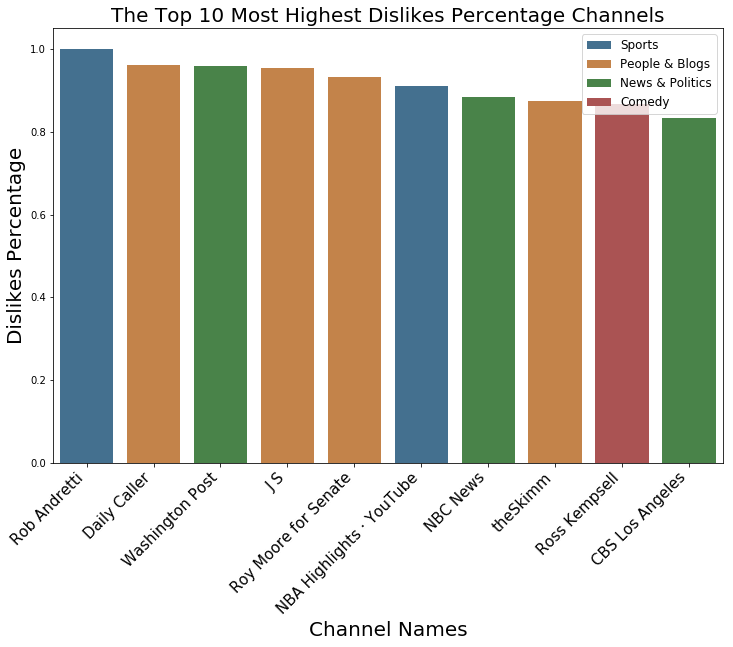

In [417]:
# Barplot - the top 10 channels with the highest dislikes rates and their categories

plt.figure(figsize=(12, 8))
dislike_plot = sns.barplot(x='channel_title', y = 'dislikes_percent', hue='category_name', 
            dodge=False, saturation = 0.5, data=top_dislikes)

plt.xticks(ha = 'right', rotation = 45, size = 15)

plt.title('The Top 10 Most Highest Dislikes Percentage Channels', size = 20)
plt.xlabel('Channel Names', size = 20)
plt.ylabel('Dislikes Percentage', size = 20)
plt.legend(loc="upper right", prop={'size': 12})

In [420]:
# The top 5 categories with the highest dislikes rates

dislikes_df['freq_dislikes'] = dislikes_df.groupby('category_name')['category_name'].transform('count')
dislikes_category = dislikes_df.drop_duplicates(["category_name"], keep = 'first')
dislikes_category = dislikes_category.sort_values(by = 'freq_dislikes', ascending = False).head(5)

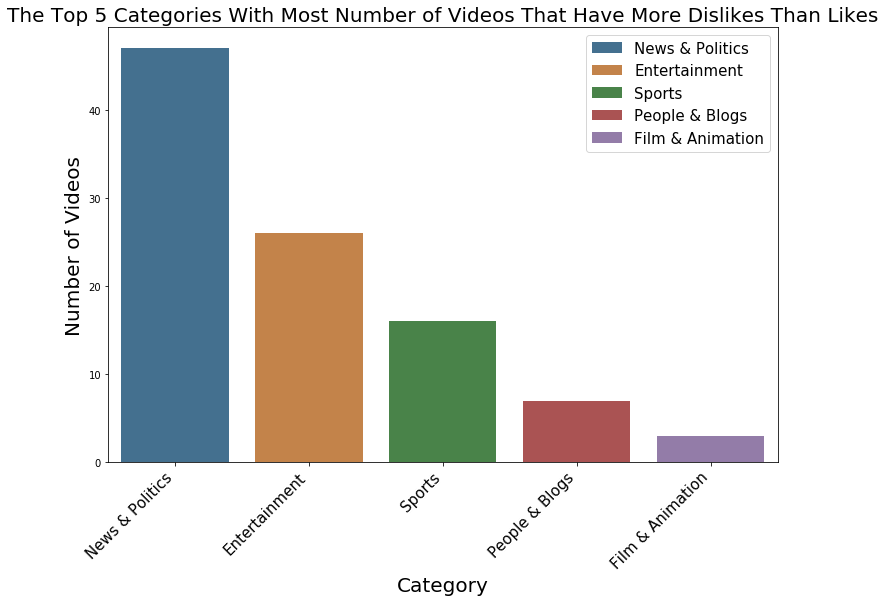

In [423]:
# Barplot - The top 5 categories with the highest dislikes rates

plt.figure(figsize=(12, 8))
dislike_plot2 = sns.barplot(x='category_name', y = 'freq_dislikes', hue='category_name', 
            dodge=False, saturation = 0.5, data=dislikes_category)

plt.xticks(ha = 'right', rotation = 45, size = 15)

plt.title('The Top 5 Categories With Most Number of Videos That Have More Dislikes Than Likes', size = 20)
plt.xlabel('Category', size = 20)
plt.ylabel('Number of Videos', size = 20)
plt.legend(loc="upper right", prop={'size': 15})